In [12]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
import xgboost as xgb
from tabulate import tabulate

sns.set(style='whitegrid', palette='muted', color_codes=True)

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc
from sklearn.ensemble import RandomForestClassifier
from sklearn.inspection import permutation_importance

import random
random.seed(42)
np.random.seed(42)

import scipy.stats as stats
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('/content/Real_Estate_Sales_2001-2022_GL (1).csv')
df.head()

<ipython-input-3-91f2065255b4>:1: DtypeWarning: Columns (8,9,10,11,12) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/Real_Estate_Sales_2001-2022_GL (1).csv')


Serial Number  List Year Date Recorded     Town          Address  \
0        2020177       2020    04/14/2021  Ansonia    323 BEAVER ST   
1        2020225       2020    05/26/2021  Ansonia   152 JACKSON ST   
2        2020348       2020    09/13/2021  Ansonia  230 WAKELEE AVE   
3        2020090       2020    12/14/2020  Ansonia      57 PLATT ST   
4         210288       2021    06/20/2022     Avon   12 BYRON DRIVE   

   Assessed Value  Sale Amount  Sales Ratio Property Type Residential Type  \
0        133000.0     248400.0       0.5354   Residential    Single Family   
1        110500.0     239900.0       0.4606   Residential     Three Family   
2        150500.0     325000.0       0.4630    Commercial              NaN   
3        127400.0     202500.0       0.6291   Residential       Two Family   
4        179990.0     362500.0       0.4965   Residential            Condo   

  Non Use Code Assessor Remarks OPM remarks  \
0          NaN              NaN         NaN   
1          NaN              NaN         NaN   
2          NaN              NaN         NaN   
3          NaN              NaN         NaN   
4          NaN              NaN         NaN   

                             Location  
0          POINT (-73.06822 41.35014)  
1                                 NaN  
2                                 NaN  
3                                 NaN  
4  POINT (-72.879115982 41.773452988)

In [4]:
df.tail()

Serial Number  List Year Date Recorded           Town  \
254789          30025       2003    11/04/2003         Orange   
254790          30725       2003    06/24/2004      Fairfield   
254791          31526       2003    09/20/2004        Bristol   
254792          30371       2003    03/01/2004        Enfield   
254793          30641       2003    05/20/2004  East Hartford   

                  Address  Assessed Value  Sale Amount  Sales Ratio  \
254789  826 RAIL FENCE RD        260300.0     545000.0     0.477615   
254790     150 LONDON TER        198590.0     535200.0     0.371058   
254791       65 SANDRA ST         94580.0     169000.0     0.559645   
254792     940 ENFIELD ST         76510.0     200000.0     0.382550   
254793     85 BEDFORD AVE             NaN          NaN          NaN   

       Property Type Residential Type Non Use Code Assessor Remarks  \
254789           NaN              NaN          7.0              NaN   
254790           NaN              NaN          NaN              NaN   
254791           NaN              NaN          NaN              NaN   
254792           NaN              NaN          7.0              NaN   
254793           NaN              NaN          NaN              NaN   

       OPM remarks                    Location  
254789         NaN                         NaN  
254790         NaN                         NaN  
254791         NaN                         NaN  
254792         NaN  POINT (-72.59445 41.99622)  
254793         NaN                         NaN

In [5]:
df.shape

(254794, 14)

<Axes: >

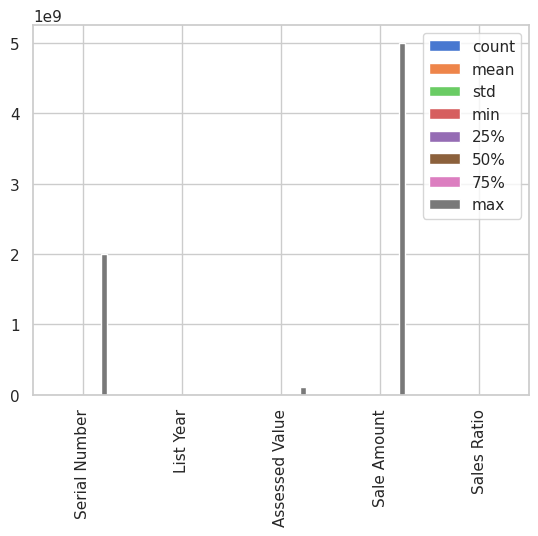

In [6]:
df.describe().T.plot(kind='bar')

In [7]:
df.columns.to_list()

['Serial Number',
 'List Year',
 'Date Recorded',
 'Town',
 'Address',
 'Assessed Value',
 'Sale Amount',
 'Sales Ratio',
 'Property Type',
 'Residential Type',
 'Non Use Code',
 'Assessor Remarks',
 'OPM remarks',
 'Location']

In [8]:
df.duplicated().sum()

np.int64(0)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 254794 entries, 0 to 254793
Data columns (total 14 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Serial Number     254794 non-null  int64  
 1   List Year         254794 non-null  int64  
 2   Date Recorded     254792 non-null  object 
 3   Town              254794 non-null  object 
 4   Address           254787 non-null  object 
 5   Assessed Value    254793 non-null  float64
 6   Sale Amount       254793 non-null  float64
 7   Sales Ratio       254793 non-null  float64
 8   Property Type     123889 non-null  object 
 9   Residential Type  112451 non-null  object 
 10  Non Use Code      57857 non-null   object 
 11  Assessor Remarks  25992 non-null   object 
 12  OPM remarks       3619 non-null    object 
 13  Location          113115 non-null  object 
dtypes: float64(3), int64(2), object(9)
memory usage: 27.2+ MB


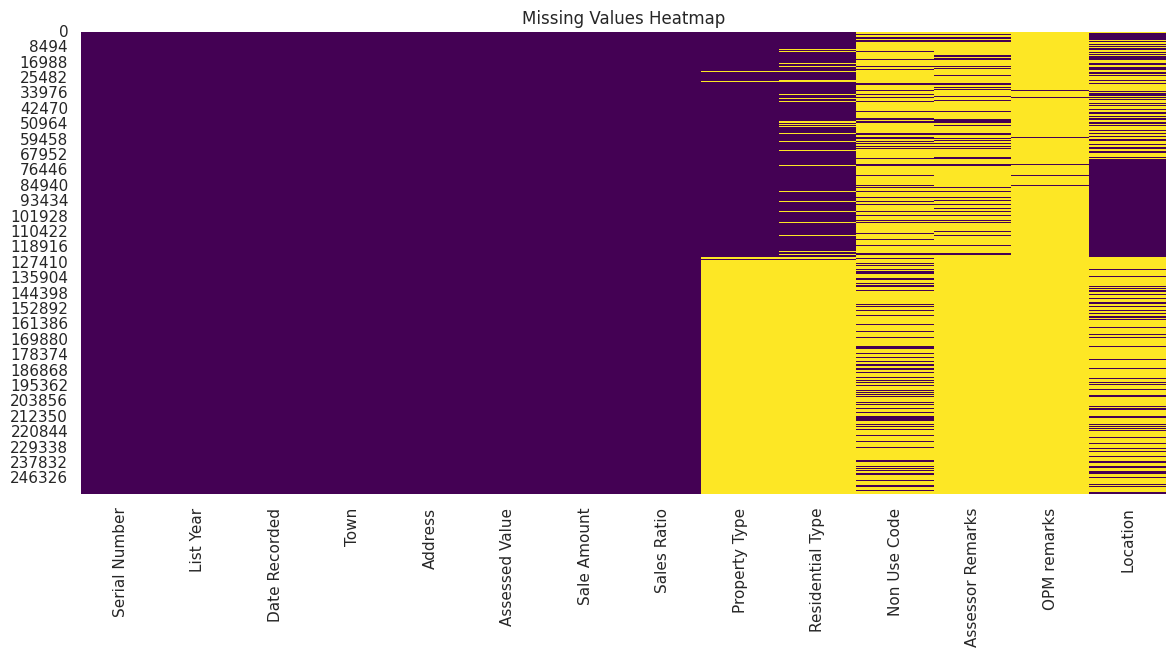

In [10]:
plt.figure(figsize=(14,6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()